In [1]:
import pandas as pd
import pandas as pd
from datetime import timedelta
from utils_2 import  Loss_Aversion, calcRollingTimimgAbility_MH,calcRollingStockSelection_MH, calcRollingTimimgAbility_TM,calcRollingStockSelection_TM,VaR
import warnings
warnings.filterwarnings("ignore")

In [2]:
f1_DailyAuM = pd.read_csv("./Data/Daily AuM - AuM (1).csv", index_col="Date")
f1_DailyTrades = pd.read_csv("./Data/Daily AuM - Trades_10.csv")
f1_RiskFree = pd.read_csv("./Data/United-States-5-Year-Bond-Yield-Historical-Data.csv", index_col="Date")[["Price"]]
btcData  = pd.read_csv("./Data/Bitcoin-Historical-Data.csv", index_col="Date")
btcData["Price"] = btcData.apply(lambda x:float(x["Price"].replace(",","")), axis=1)

f1_DailyAuM.index = pd.to_datetime(f1_DailyAuM.index)
f1_RiskFree.index = pd.to_datetime(f1_RiskFree.index)
btcData.index = pd.to_datetime(btcData.index)
f1_DailyTrades.buy_date = pd.to_datetime(f1_DailyTrades.buy_date)
f1_DailyTrades.sell_date = pd.to_datetime(f1_DailyTrades.sell_date)

f1_RiskFree["Price"] = f1_RiskFree.apply(lambda x: (1 + x["Price"]/100)**(1/365) - 1 , axis=1)


# Loss Aversion (LA)

In [7]:
la = Loss_Aversion(f1_DailyTrades.iloc[-200:])
df = la.Loss_Aversion_data()

All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!


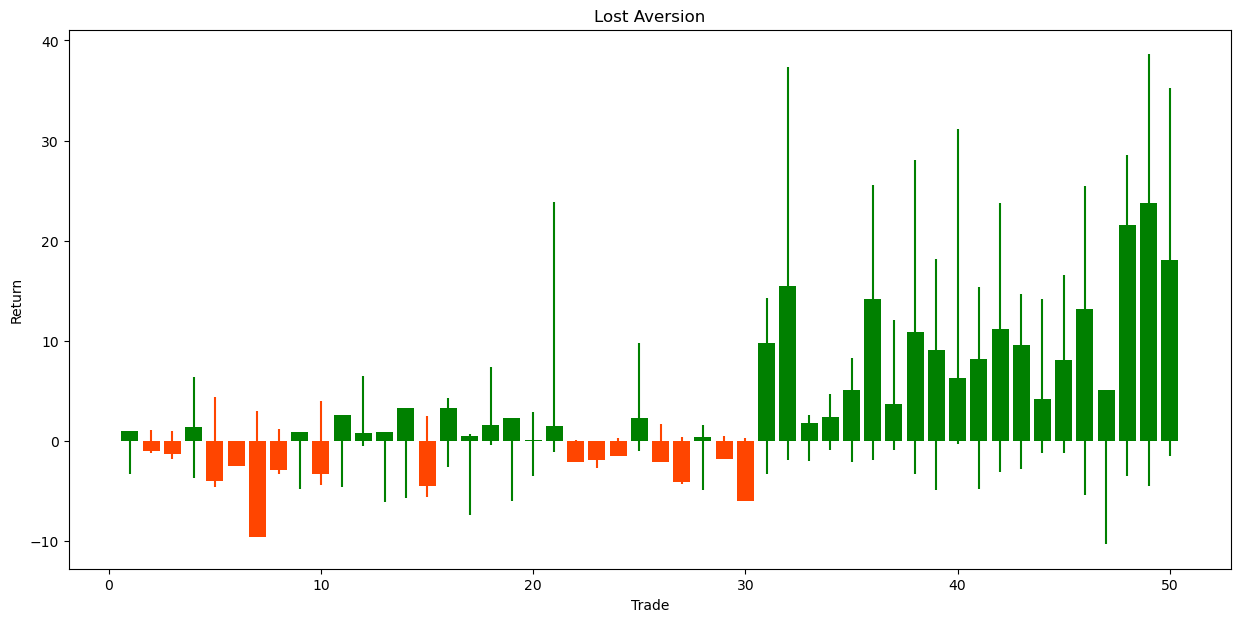

In [18]:
la.get_plot(df,50)

<Axes: >

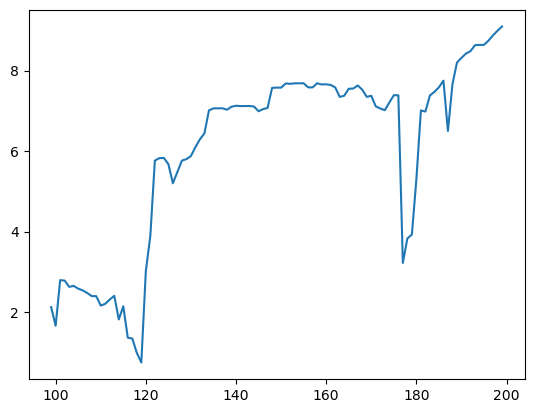

In [11]:
la.get_score(df)["la_score"].plot()

# TimimgAbility and StockSelectionAbility

In [3]:
dfReturn = pd.concat([f1_DailyAuM.AuM, btcData.Price, f1_RiskFree.Price], axis = 1)
dfReturn.columns = ["Fund", "Benchmark", "RiskFreeReturn"]
dfReturn = dfReturn.dropna(subset=["Fund"])
dfReturn = dfReturn.fillna(method ="ffill" )
dfReturn["Fund"] = dfReturn["Fund"].pct_change()
dfReturn["Benchmark"] = dfReturn["Benchmark"].pct_change()
dfReturn = dfReturn.dropna()

## Treynor and Mazuy (1966) Model

In [4]:
TimimgAbility_6M = calcRollingTimimgAbility_TM(dfReturn, timedelta(days = 180))
TimimgAbility_1Y = calcRollingTimimgAbility_TM(dfReturn, timedelta(days = 365))
TimimgAbility_3Y = calcRollingTimimgAbility_TM(dfReturn, timedelta(days = 365 * 3))

StockSelection_6M = calcRollingStockSelection_TM(dfReturn, timedelta(days = 180))
StockSelection_1Y = calcRollingStockSelection_TM(dfReturn, timedelta(days = 365))
StockSelection_3Y = calcRollingStockSelection_TM(dfReturn, timedelta(days = 365 * 3))

<Axes: xlabel='Date'>

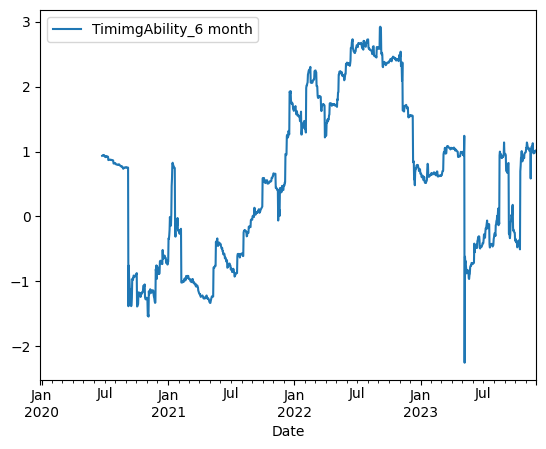

In [5]:
TimimgAbility_6M.plot()

<Axes: xlabel='Date'>

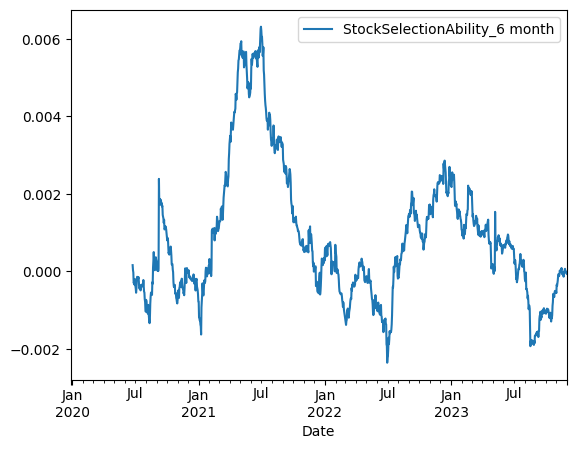

In [6]:
StockSelection_6M.plot()

## Merton and Henriksson (1981) Model

In [6]:
TimimgAbility_6M = calcRollingTimimgAbility_MH(dfReturn, timedelta(days = 180))
TimimgAbility_1Y = calcRollingTimimgAbility_MH(dfReturn, timedelta(days = 365))
TimimgAbility_3Y = calcRollingTimimgAbility_MH(dfReturn, timedelta(days = 365 * 3))

StockSelection_6M = calcRollingStockSelection_MH(dfReturn, timedelta(days = 180))
StockSelection_1Y = calcRollingStockSelection_MH(dfReturn, timedelta(days = 365))
StockSelection_3Y = calcRollingStockSelection_MH(dfReturn, timedelta(days = 365 * 3))

<Axes: xlabel='Date'>

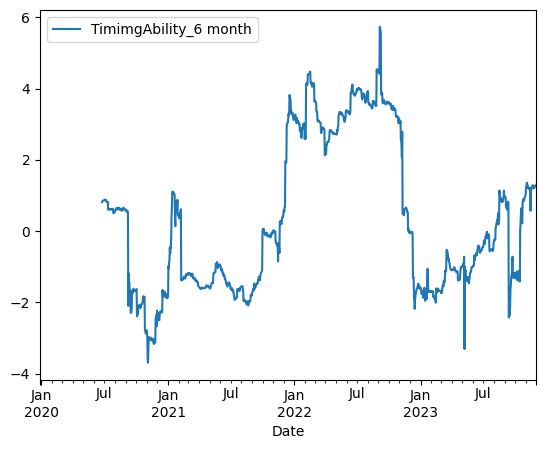

In [8]:
TimimgAbility_6M.plot()

<Axes: xlabel='Date'>

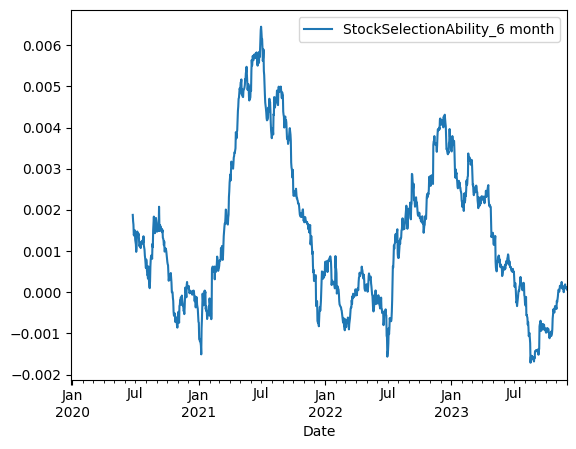

In [9]:
StockSelection_6M.plot()

# VaR

In [3]:
var_object = VaR(df=f1_DailyTrades,ConfidenceLevel=0.95,TimeHorizon=1)

In [4]:
df_VaR = var_object.calcVaR()

All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!


<Axes: >

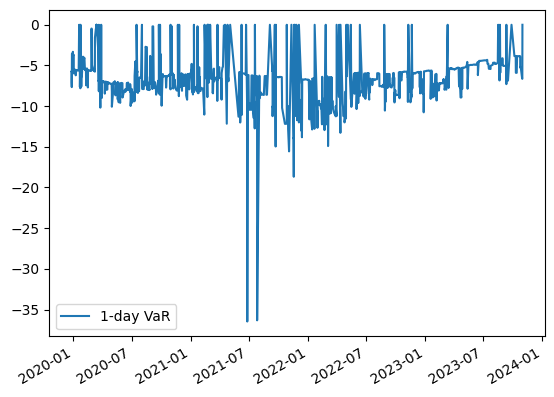

In [5]:
df_VaR.plot()